In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

from utils.model_utils import *

## 1. Redimensionando e Selecionando os atributos

In [2]:
df = pd.read_csv("../data\creditcardClean.csv")

In [3]:
df

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281913,284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
281914,284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
281915,284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
281916,284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# Separando os dados entre X(Variaveis que serão usadas para fazer a previsão) e y(a classe a ser prevista).
X = df.drop('Class', axis=1)
y = df['Class']

In [5]:
X.drop(["Unnamed: 0", "Time"], axis=1, inplace=True)

In [6]:
# Selecionando os atributos de acordo com a variancia
selection = VarianceThreshold(threshold=0.400)
X_selection = selection.fit_transform(X)

In [7]:
selection.variances_

array([3.78749015e+00, 2.70891792e+00, 2.27030679e+00, 1.96932009e+00,
       1.89222500e+00, 1.77224844e+00, 1.49949374e+00, 1.38276235e+00,
       1.20115881e+00, 1.15629871e+00, 1.03404382e+00, 9.85901048e-01,
       9.89441592e-01, 9.01829362e-01, 8.34102620e-01, 7.63230785e-01,
       7.05567565e-01, 7.02150950e-01, 6.58364599e-01, 5.92303597e-01,
       5.21241074e-01, 5.24808916e-01, 3.87209826e-01, 3.66963465e-01,
       2.71440867e-01, 2.32092374e-01, 1.56206077e-01, 1.07779625e-01,
       6.30512425e+04])

In [8]:
X_selection.shape

(281918, 23)

In [9]:
X_selection = pd.DataFrame(X_selection, columns=X.iloc[:, 0:23].columns)

In [10]:
# Divindo entre treino e teste, evitando o overfitting.
X_train, X_test, y_train, y_test = train_test_split(X_selection, y, test_size=0.25,  random_state=3)

In [11]:
X_train.shape, X_test.shape

((211438, 23), (70480, 23))

In [12]:
y_train.shape, y_test.shape

((211438,), (70480,))

In [13]:
y_train.value_counts(), y_test.value_counts()

(Class
 0    211124
 1       314
 Name: count, dtype: int64,
 Class
 0    70346
 1      134
 Name: count, dtype: int64)

In [14]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
123514,-0.550807,1.144618,1.152773,0.865353,0.088730,-0.728566,0.962482,-0.237128,-0.594260,0.048341,...,0.108553,0.950898,-0.365077,-0.250237,-0.005017,0.398000,0.151529,0.123891,0.551241,52.98
131783,-0.983962,-0.100238,1.516454,-0.359320,0.313583,-1.098907,1.168399,-0.345336,-0.247665,-0.581369,...,0.063681,0.449590,0.310648,-0.707264,-0.060631,-0.786847,0.342711,0.196944,0.295539,140.42
43646,1.106189,0.019314,0.345537,1.429602,-0.291432,-0.199974,0.020364,0.050315,0.482399,-0.100765,...,0.328856,0.051116,-0.658785,0.338086,-0.814063,-0.368542,-0.212006,-0.098545,-0.177627,38.23
186252,-0.713038,0.409267,1.511247,-0.392901,0.368009,-0.180348,0.218249,0.102449,0.369993,-0.761991,...,-0.079895,0.675139,0.003776,-0.438811,0.116194,0.410052,-0.016784,-0.103500,-0.369614,13.99
55043,-0.732798,1.231588,0.870863,0.068436,-0.222260,-0.590342,0.208268,0.561531,-0.381642,-0.746934,...,0.161217,1.242420,0.270779,0.525623,-0.396087,-0.447240,-0.095002,-0.204880,-0.687319,8.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11261,0.860589,-0.750088,0.315631,-0.340120,0.322756,-0.109367,-0.649940,-0.201310,1.000941,0.484932,...,0.570643,-0.903123,0.196948,1.390000,-1.542194,1.158770,0.195282,-0.100078,0.198232,5.00
48056,1.225187,-1.017023,-0.764725,-1.986176,1.200919,3.751415,-1.111162,1.017501,2.314387,-1.368883,...,-0.587890,-1.032568,-1.194452,0.339055,-0.469343,2.032089,0.056498,-0.491742,-1.105490,38.33
77049,1.128621,-0.080277,1.120841,1.283601,-0.949732,-0.128658,-0.583324,0.213960,0.661255,0.030842,...,0.126236,-0.553553,0.084620,-0.307245,0.546148,-0.012223,-0.215364,0.138504,0.572149,1.00
198296,1.629366,-1.497184,-0.672931,-0.616073,-0.869219,0.440013,-0.755099,0.248891,1.951360,-0.504195,...,-0.206959,-0.882425,0.095948,-0.374109,0.217467,1.118206,0.210019,-0.134935,-0.578114,200.00


In [15]:
X_train = preprocessor(X=X_train, X_column=X_selection)
X_test = preprocessor(X=X_test, X_column=X_selection)

In [16]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
0,0.932342,0.781576,0.941518,0.290291,0.769954,0.235212,0.241185,0.782842,0.489433,0.603646,...,0.645021,0.407413,0.437742,0.712609,0.652947,0.594395,0.581879,0.563477,0.535746,0.002062
1,0.922582,0.766489,0.948438,0.236002,0.771475,0.231386,0.242491,0.781681,0.505539,0.587316,...,0.643493,0.369937,0.459231,0.698789,0.649122,0.501869,0.583914,0.564654,0.523818,0.005465
2,0.969678,0.767938,0.926157,0.315303,0.767383,0.240673,0.235209,0.785925,0.539465,0.599779,...,0.652528,0.340149,0.428401,0.730400,0.597304,0.534535,0.578008,0.559891,0.501745,0.001488
3,0.928687,0.772664,0.948339,0.234513,0.771843,0.240876,0.236464,0.786484,0.534241,0.582631,...,0.638600,0.386799,0.449472,0.706907,0.661283,0.595336,0.580087,0.559811,0.492789,0.000544
4,0.928242,0.782630,0.936153,0.254964,0.767851,0.236640,0.236401,0.791409,0.499313,0.583022,...,0.646816,0.429207,0.457963,0.736071,0.626051,0.528389,0.579254,0.558177,0.477968,0.000350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211433,0.964144,0.758613,0.925588,0.236853,0.771537,0.241609,0.230957,0.783226,0.563561,0.614969,...,0.660766,0.268813,0.455615,0.762210,0.547225,0.653805,0.582345,0.559866,0.519279,0.000194
211434,0.972360,0.755378,0.905030,0.163885,0.777477,0.281494,0.228032,0.796300,0.624596,0.566892,...,0.621292,0.259136,0.411366,0.730429,0.621012,0.722004,0.580867,0.553552,0.458460,0.001492
211435,0.970184,0.766731,0.940910,0.308831,0.762930,0.241410,0.231380,0.787681,0.547776,0.603192,...,0.645624,0.294945,0.452043,0.710886,0.690854,0.562360,0.577972,0.563712,0.536722,0.000039
211436,0.981467,0.749558,0.906777,0.224620,0.763475,0.247284,0.230290,0.788055,0.607727,0.589317,...,0.634271,0.270360,0.452403,0.708864,0.668249,0.650637,0.582501,0.559304,0.483062,0.007784


## 2. Avaliando modelos e hiperparamteros

In [17]:
validation_clf_models(X_train, X_test, y_train, y_test)

SVC(probability=True)
 
F1 Score train: 0.801
Accuracy train: 0.999
Recall train: 0.790
Precision train: 0.813
Log loss train: 0.021
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
F1 Score test: 0.543
Accuracy test: 0.999
Recall test: 0.403
Precision test: 0.831
Log loss test: 0.047
--------------------------------------------------
LogisticRegression()
 
F1 Score train: 0.635
Accuracy train: 0.999
Recall train: 0.510
Precision train: 0.842
Log loss train: 0.031
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
F1 Score test: 0.460
Accuracy test: 0.999
Recall test: 0.321
Precision test: 0.811
Log loss test: 0.052
--------------------------------------------------
RandomForestClassifier()
 
F1 Score train: 1.000
Accuracy train: 1.000
Recall train: 1.000
Precision train: 1.000
Log loss train: 0.000
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
F1 Score test: 0.520
Accuracy test: 0.999
Recall test: 0.381
Precision test: 0.823
Log loss test: 0.048
--

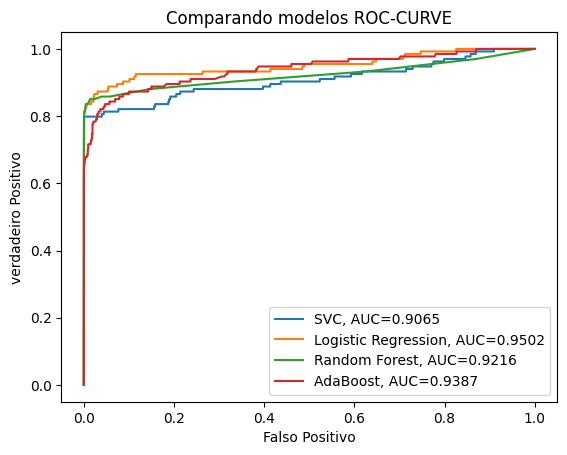

In [18]:
plot_validation_clf_models(X_train, X_test, y_train, y_test)

In [19]:
#param_model_select(X_train, y_train)

In [20]:
#best_params_models( X_train, y_train)

## 3. Criação do modelo

In [26]:
clf = AdaBoostClassifier(algorithm="SAMME", learning_rate=1.0, n_estimators=100)

In [27]:
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100)

In [29]:
predict = clf.predict(X_test)

In [30]:
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70346
           1       0.84      0.51      0.63       134

    accuracy                           1.00     70480
   macro avg       0.92      0.75      0.82     70480
weighted avg       1.00      1.00      1.00     70480

--------------------------------------------------
F1 Score test: 0.633


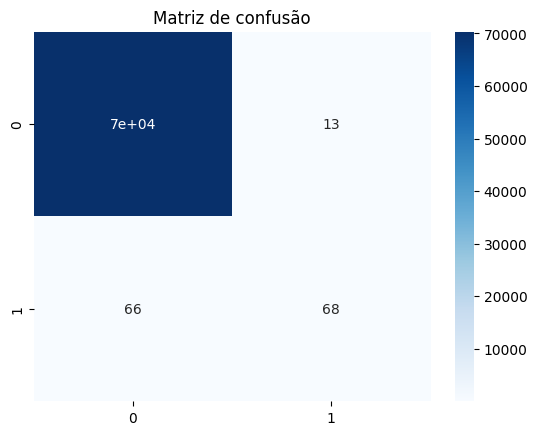

In [31]:
evaluate(y_test, predict)

## 4. Exportação do modelo

In [32]:
fraud_detection_clf = AdaBoostClassifier(algorithm="SAMME", learning_rate=1.0, n_estimators=100)

In [33]:
fraud_detection_clf.fit(X_selection, y)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100)

In [36]:
with open('model/fraud_detection_clf.sav', 'wb') as m:
    pickle.dump(fraud_detection_clf, m)